In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
sess = tf.InteractiveSession()

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# quick fn to plot images
imshow = lambda img : plt.imshow(1 - img.reshape((img.shape[1], img.shape[2])),
                                 cmap='Greys_r',interpolation='nearest')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
test_img = tf.reshape(mnist.train.images[1], [1,28,28,1])

In [5]:
maxpool, argmax = tf.nn.max_pool_with_argmax(test_img,
                                             [1,2,2,1],
                                             [1,2,2,1],
                                            padding='SAME')

In [8]:
maxflat = tf.reshape(maxpool, [196,])
argflat = tf.reshape(argmax, [196,])
sparse = tf.sparse_to_dense(argflat, [784], maxflat,validate_indices=False)
reshaped = tf.reshape(sparse, [1,28,28,1])

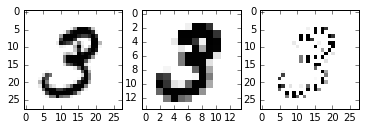

In [9]:
plt.subplot(1,3,1)
imshow(test_img.eval())
plt.subplot(1,3,2)
imshow(maxpool.eval())
plt.subplot(1,3,3)
imshow(reshaped.eval())

In [20]:
filt = tf.Variable(tf.truncated_normal([3,3,1,3], stddev=.1))
filt.initializer.run()
conv = tf.nn.conv2d(test_img, filt, [1,1,1,1] ,'SAME')
deconv = tf.nn.conv2d_transpose(conv, filt, [1,28,28,1], [1,1,1,1])

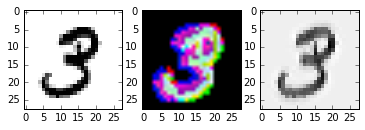

In [22]:
plt.subplot(1,3,1)
imshow(test_img.eval())
plt.subplot(1,3,2)
plt.imshow(conv.eval().reshape([28,28,3]))
plt.subplot(1,3,3)
imshow(deconv.eval())

## Gradient experiments

In [10]:
from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_nn_ops
@ops.RegisterGradient("MaxPoolWithArgmax")
def _MaxPoolGrad(op, grad):
  return gen_nn_ops._max_pool_grad(op.inputs[0],
                                   op.outputs[0],
                                   grad,
                                   op.get_attr("ksize"),
                                   op.get_attr("strides"),
                                   padding=op.get_attr("padding"),
                                   data_format=op.get_attr("data_format"))